\author{Vinith}
\title{Data Analysis using Pandas}
\date{\today}
\begin{abstract}
This paper explores data analysis using the Pandas library in Python. We discuss various techniques and functions provided by Pandas to manipulate, analyze, and visualize data effectively.
\end{abstract}

Credits - zero-to-mastery-ml - https://github.com/mrdbourke/zero-to-mastery-ml/tree/master/data


https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery

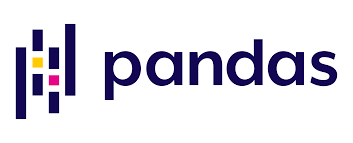

In [334]:
from IPython.display import display, Image

display(Image(filename="./Resources/Images/Pandas Image.png"))

#### This statement imports the Pandas library and allows you to use it in your script with the alias pd, which is a common convention in the Python community. https://pandas.pydata.org/

In [291]:
import pandas as pd

#### pd.Series is a data structure in the Pandas library, which is a powerful data manipulation and analysis library for Python. A Series is a one-dimensional array-like object that can hold data of any type (integer, float, string, Python objects, etc.). It is similar to a column in a spreadsheet or a SQL table. Each element in a Series has an associated label, known as the index.

In [292]:
# Series = 1 - dimensional

series = pd.Series(["BMW","Toyota","Honda"])
colours = pd.Series(["White","Yellow","Blue"])
series,colours

(0       BMW
 1    Toyota
 2     Honda
 dtype: object,
 0     White
 1    Yellow
 2      Blue
 dtype: object)

#### A DataFrame is another core data structure in the Pandas library. It is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). Think of it as a table or a spreadsheet in Python, where each column can hold different types of data.

In [293]:
# Dataframe = 2 - dimensional

car_data = pd.DataFrame({"Car make": series,"Colours": colours})
car_data

,Car make,Colours
0,BMW,White
1,Toyota,Yellow
2,Honda,Blue


In [294]:
# Importing the data

car_sales =pd.read_csv("./Resources/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


#### Anatomy of a Pandas DataFrame - Credits https://www.ibmmainframer.com/python-tutorial/pandas_viewing_data/

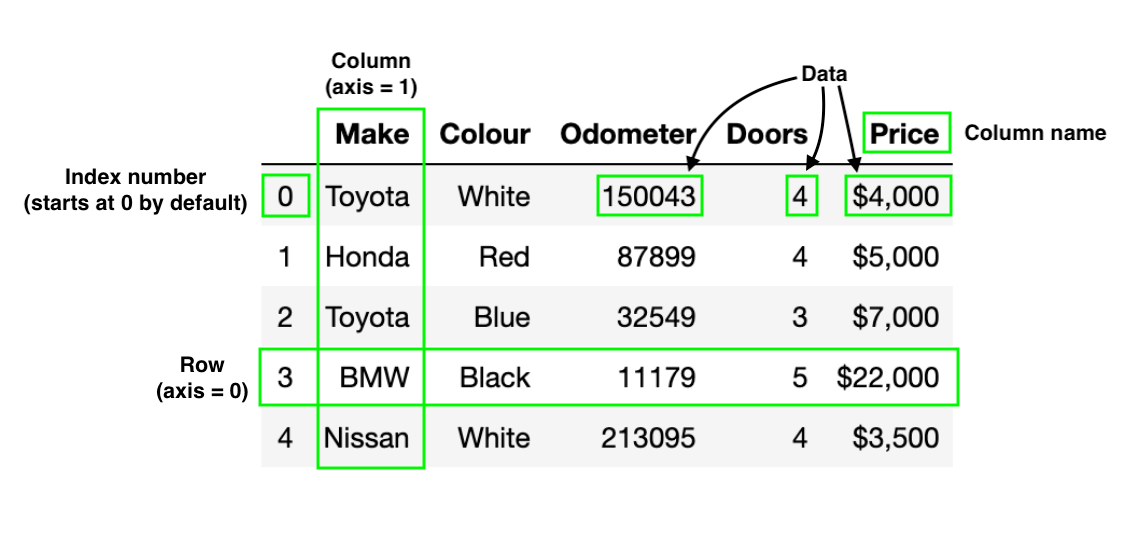

In [295]:
from IPython.display import display, Image

display(Image(filename="./Resources/Images/pandas-dataframe-anatomy.png"))

In [296]:
# Exporting the DataFrame to see how does it work 
## Note index=False removes additional indexing column

car_sales.to_csv("Resources/exported-car-sales.csv", index=False)
exported_car_sales = pd.read_csv("Resources/exported-car-sales.csv")
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Describing the data using Attributes and functions.

In [297]:
#information about the dataset
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [298]:
# How to return list of column names
car_sales_columns = car_sales.columns
car_sales_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [299]:
# Index data
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [300]:
# Describing the data set, Statistically. Works only on Numeric Columns.
car_sales.describe()
#if we notice only the int64 dtypes gets populated.

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [301]:
#This method provides useful information about the DataFrame, such as the number of non-null entries, 
#data type of each column, memory usage, and more.
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [302]:
# Lets find the mean for numeric values.
car_sales.mean(numeric_only=True)

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [303]:
# Lets find the sum 
car_sales.sum(numeric_only=True)

Odometer (KM)    786014
Doors                40
dtype: int64

In [304]:
#Number of rows
len(car_sales)

10

### Viewing and selecting data

In [305]:
#Look first few rows - By default head() returns five if not specified else goes by head(7)
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [306]:
#Look bottom few rows - By default tail() returns five if not specified else goes by tail(7)
car_sales.tail(2)

,Make,Colour,Odometer (KM),Doors,Price
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [307]:
# .loc and .iloc
animals = pd.Series(["Panda","Snake","cat","Dog"],index=[0,3,9,3])
animals

0    Panda
3    Snake
9      cat
3      Dog
dtype: object

#### loc method is used for label-based indexing. It allows you to access a group of rows and columns by labels or a boolean array.
#### iloc method is used for integer-location based indexing. It allows you to access a group of rows and columns by integer positions (similar to indexing in NumPy).

In [308]:
animals.loc[3],animals.iloc[3]

(3    Snake
 3      Dog
 dtype: object,
 'Dog')

In [309]:
# upto position 3 that is 0 ,1 and 2 Index.
animals.iloc[:3]

0    Panda
3    Snake
9      cat
dtype: object

In [310]:
# various ways to read a particular column
car_sales.Make

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [311]:
# various ways to read a particular column
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [312]:
# Applying filters
car_sales[car_sales["Make"]=="Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [313]:
# Crosstab  It is used to summarize the relationship between two  variables. 
# The function returns a DataFrame that contains the frequency of each combination of the factors.
pd.crosstab(car_sales["Make"],car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [314]:
#Group By function
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

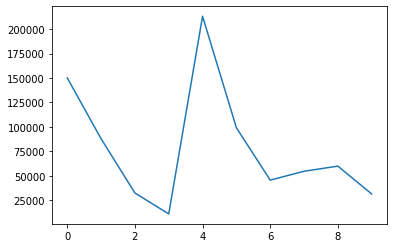

In [315]:
# just few charts from Matplotlib
car_sales["Odometer (KM)"].plot()

<AxesSubplot:>

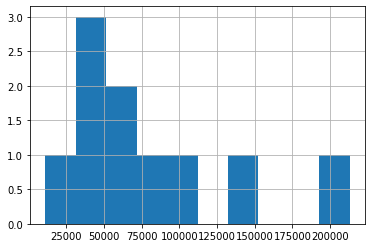

In [316]:
# just few charts from Matplotlib
car_sales["Odometer (KM)"].hist()

In [317]:
# Converting one of Obj dtype to int
#Removing Symbols, comma


# Clean 'Price' column and convert to integer
car_sales['Price'] = car_sales['Price'].str.replace('\$', '').str.replace(',', '',regex=True).astype(float).astype(int)

car_sales

/local/pkg/python/root-python-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [318]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

<AxesSubplot:>

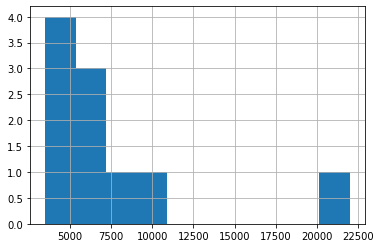

In [319]:
# just few charts from Matplotlib
car_sales["Price"].hist()

### Manipulating Data

In [320]:
#Exploring one of the column using upper case function
car_sales["Make"]=car_sales["Make"].str.upper()
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,TOYOTA,White,150043,4,4000
1,HONDA,Red,87899,4,5000
2,TOYOTA,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,NISSAN,White,213095,4,3500
5,TOYOTA,Green,99213,4,4500
6,HONDA,Blue,45698,4,7500
7,HONDA,Blue,54738,4,7000
8,TOYOTA,White,60000,4,6250
9,NISSAN,White,31600,4,9700


In [321]:
#Importing another csv files where we can find some missing values and play around with it
car_sales_missing = pd.read_csv("Resources/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [322]:
#filling missing values using mean function.
car_sales_missing["Odometer"]=car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean())
car_sales_missing["Odometer"]=car_sales_missing["Odometer"].astype(int)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4.0,"$4,000"
1,Honda,Red,87899,4.0,"$5,000"
2,Toyota,Blue,92302,3.0,"$7,000"
3,BMW,Black,11179,5.0,"$22,000"
4,Nissan,White,213095,4.0,"$3,500"
5,Toyota,Green,92302,4.0,"$4,500"
6,Honda,NaN,92302,4.0,"$7,500"
7,Honda,Blue,92302,4.0,NaN
8,Toyota,White,60000,NaN,NaN
9,NaN,White,31600,4.0,"$9,700"


In [323]:
# we can drop the missing values using the function.
car_sales_missing_dropped=car_sales_missing.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043,4.0,"$4,000"
1,Honda,Red,87899,4.0,"$5,000"
2,Toyota,Blue,92302,3.0,"$7,000"
3,BMW,Black,11179,5.0,"$22,000"
4,Nissan,White,213095,4.0,"$3,500"
5,Toyota,Green,92302,4.0,"$4,500"


In [324]:
#Lets create few more series and add them to the dataframe.

seats_column = pd.Series([5,5,5,5,6])

#New column called seats
car_sales["Seats"]=seats_column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,TOYOTA,White,150043,4,4000,5.0
1,HONDA,Red,87899,4,5000,5.0
2,TOYOTA,Blue,32549,3,7000,5.0
3,BMW,Black,11179,5,22000,5.0
4,NISSAN,White,213095,4,3500,6.0
5,TOYOTA,Green,99213,4,4500,NaN
6,HONDA,Blue,45698,4,7500,NaN
7,HONDA,Blue,54738,4,7000,NaN
8,TOYOTA,White,60000,4,6250,NaN
9,NISSAN,White,31600,4,9700,NaN


In [244]:
car_sales["Seats"]=car_sales["Seats"].fillna(car_sales["Seats"].min())
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,TOYOTA,White,150043,4,"$4,000.00",5.0
1,HONDA,Red,87899,4,"$5,000.00",5.0
2,TOYOTA,Blue,32549,3,"$7,000.00",5.0
3,BMW,Black,11179,5,"$22,000.00",5.0
4,NISSAN,White,213095,4,"$3,500.00",6.0
5,TOYOTA,Green,99213,4,"$4,500.00",5.0
6,HONDA,Blue,45698,4,"$7,500.00",5.0
7,HONDA,Blue,54738,4,"$7,000.00",5.0
8,TOYOTA,White,60000,4,"$6,250.00",5.0
9,NISSAN,White,31600,4,"$9,700.00",5.0


In [325]:
# Adding column - fuel economy with few arithmetic operations to gain some experience.
fuel_economy =[7.5,9.2,5.0,9.6,8.7,8.3,8.1,9.1,9.6,8.7]
car_sales["Fuel per 100KM"]=fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,TOYOTA,White,150043,4,4000,5.0,7.5
1,HONDA,Red,87899,4,5000,5.0,9.2
2,TOYOTA,Blue,32549,3,7000,5.0,5.0
3,BMW,Black,11179,5,22000,5.0,9.6
4,NISSAN,White,213095,4,3500,6.0,8.7
5,TOYOTA,Green,99213,4,4500,NaN,8.3
6,HONDA,Blue,45698,4,7500,NaN,8.1
7,HONDA,Blue,54738,4,7000,NaN,9.1
8,TOYOTA,White,60000,4,6250,NaN,9.6
9,NISSAN,White,31600,4,9700,NaN,8.7


In [326]:
car_sales["Total Fuel Used"]=car_sales["Odometer (KM)"]/100*car_sales["Fuel per 100KM"].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total Fuel Used
0,TOYOTA,White,150043,4,4000,5.0,7.5,10503.01
1,HONDA,Red,87899,4,5000,5.0,9.2,7910.91
2,TOYOTA,Blue,32549,3,7000,5.0,5.0,1627.45
3,BMW,Black,11179,5,22000,5.0,9.6,1006.11
4,NISSAN,White,213095,4,3500,6.0,8.7,17047.60
5,TOYOTA,Green,99213,4,4500,NaN,8.3,7937.04
6,HONDA,Blue,45698,4,7500,NaN,8.1,3655.84
7,HONDA,Blue,54738,4,7000,NaN,9.1,4926.42
8,TOYOTA,White,60000,4,6250,NaN,9.6,5400.00
9,NISSAN,White,31600,4,9700,NaN,8.7,2528.00


In [327]:
car_sales["Number of Wheels"]=4
car_sales["Number of Wheel"]=4
car_sales["Safety Test Passed"]=True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total Fuel Used,Number of Wheels,Number of Wheel,Safety Test Passed
0,TOYOTA,White,150043,4,4000,5.0,7.5,10503.01,4,4,True
1,HONDA,Red,87899,4,5000,5.0,9.2,7910.91,4,4,True
2,TOYOTA,Blue,32549,3,7000,5.0,5.0,1627.45,4,4,True
3,BMW,Black,11179,5,22000,5.0,9.6,1006.11,4,4,True
4,NISSAN,White,213095,4,3500,6.0,8.7,17047.60,4,4,True
5,TOYOTA,Green,99213,4,4500,NaN,8.3,7937.04,4,4,True
6,HONDA,Blue,45698,4,7500,NaN,8.1,3655.84,4,4,True
7,HONDA,Blue,54738,4,7000,NaN,9.1,4926.42,4,4,True
8,TOYOTA,White,60000,4,6250,NaN,9.6,5400.00,4,4,True
9,NISSAN,White,31600,4,9700,NaN,8.7,2528.00,4,4,True


In [328]:
# How to remove one of the column
car_sales.drop("Number of Wheel",axis=1,inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total Fuel Used,Number of Wheels,Safety Test Passed
0,TOYOTA,White,150043,4,4000,5.0,7.5,10503.01,4,True
1,HONDA,Red,87899,4,5000,5.0,9.2,7910.91,4,True
2,TOYOTA,Blue,32549,3,7000,5.0,5.0,1627.45,4,True
3,BMW,Black,11179,5,22000,5.0,9.6,1006.11,4,True
4,NISSAN,White,213095,4,3500,6.0,8.7,17047.60,4,True
5,TOYOTA,Green,99213,4,4500,NaN,8.3,7937.04,4,True
6,HONDA,Blue,45698,4,7500,NaN,8.1,3655.84,4,True
7,HONDA,Blue,54738,4,7000,NaN,9.1,4926.42,4,True
8,TOYOTA,White,60000,4,6250,NaN,9.6,5400.00,4,True
9,NISSAN,White,31600,4,9700,NaN,8.7,2528.00,4,True


In [331]:
#How to shuffle the rows in the dataframe and return. Fraction 0.5 is 50 percent
car_sales=car_sales.sample(frac=1)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total Fuel Used,Number of Wheels,Safety Test Passed
5,TOYOTA,Green,99213,4,4500,NaN,8.3,7937.04,4,True
0,TOYOTA,White,150043,4,4000,5.0,7.5,10503.01,4,True
3,BMW,Black,11179,5,22000,5.0,9.6,1006.11,4,True
4,NISSAN,White,213095,4,3500,6.0,8.7,17047.60,4,True
7,HONDA,Blue,54738,4,7000,NaN,9.1,4926.42,4,True
1,HONDA,Red,87899,4,5000,5.0,9.2,7910.91,4,True
9,NISSAN,White,31600,4,9700,NaN,8.7,2528.00,4,True
6,HONDA,Blue,45698,4,7500,NaN,8.1,3655.84,4,True
8,TOYOTA,White,60000,4,6250,NaN,9.6,5400.00,4,True
2,TOYOTA,Blue,32549,3,7000,5.0,5.0,1627.45,4,True


In [332]:
#How to reset the shuffled dataset to back in order
car_sales.reset_index(drop=True, inplace=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total Fuel Used,Number of Wheels,Safety Test Passed
0,TOYOTA,Green,99213,4,4500,NaN,8.3,7937.04,4,True
1,TOYOTA,White,150043,4,4000,5.0,7.5,10503.01,4,True
2,BMW,Black,11179,5,22000,5.0,9.6,1006.11,4,True
3,NISSAN,White,213095,4,3500,6.0,8.7,17047.60,4,True
4,HONDA,Blue,54738,4,7000,NaN,9.1,4926.42,4,True
5,HONDA,Red,87899,4,5000,5.0,9.2,7910.91,4,True
6,NISSAN,White,31600,4,9700,NaN,8.7,2528.00,4,True
7,HONDA,Blue,45698,4,7500,NaN,8.1,3655.84,4,True
8,TOYOTA,White,60000,4,6250,NaN,9.6,5400.00,4,True
9,TOYOTA,Blue,32549,3,7000,5.0,5.0,1627.45,4,True


####  A lambda function in Python is a small anonymous function defined using the lambda keyword. It allows you to create a function without a proper name (anonymous) and is typically used for short, simple operations where defining a full function using def would be overkill.

In [333]:
#Applying Lambda function
car_sales["Odometer (KM)"]=car_sales["Odometer (KM)"].apply(lambda x: x/1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total Fuel Used,Number of Wheels,Safety Test Passed
0,TOYOTA,Green,62008.125,4,4500,NaN,8.3,7937.04,4,True
1,TOYOTA,White,93776.875,4,4000,5.0,7.5,10503.01,4,True
2,BMW,Black,6986.875,5,22000,5.0,9.6,1006.11,4,True
3,NISSAN,White,133184.375,4,3500,6.0,8.7,17047.60,4,True
4,HONDA,Blue,34211.250,4,7000,NaN,9.1,4926.42,4,True
5,HONDA,Red,54936.875,4,5000,5.0,9.2,7910.91,4,True
6,NISSAN,White,19750.000,4,9700,NaN,8.7,2528.00,4,True
7,HONDA,Blue,28561.250,4,7500,NaN,8.1,3655.84,4,True
8,TOYOTA,White,37500.000,4,6250,NaN,9.6,5400.00,4,True
9,TOYOTA,Blue,20343.125,3,7000,5.0,5.0,1627.45,4,True
